In [1]:
import settrade_v2
from settrade_v2 import Investor
from settrade_v2 import market

In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import plotly.graph_objects as go

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout #

In [4]:
from tvDatafeed import TvDatafeed, Interval

username = 'Nattakidzaa@gmail.com'
password = 'holl14583658'

tv = TvDatafeed(username, password)

error while signin
you are using nologin method, data you access may be limited


In [5]:
stock_data = pd.read_csv('NDX_2005_2022.csv')
stock_data.head()
#stock_data = pd.DataFrame(stock_data)#.set_index(stock_data['Date'])
df = stock_data
df_stock_All = df
Y1 = df[:-252:]
Y3 = df[:-756:]
Y5 = df[:-1259:]
df
#Y3 = df []
#df = df[:-30:]
#df
#df.loc[df.index == '2018-03-29']

,datetime,symbol,open,high,low,close,volume
0,2004-09-23 20:30:00,NASDAQ:NDX,1405.76001,1413.67993,1402.78979,1405.76978,0.0
1,2004-09-24 20:30:00,NASDAQ:NDX,1407.70996,1414.56006,1397.50000,1399.04980,0.0
2,2004-09-27 20:30:00,NASDAQ:NDX,1389.93994,1396.41992,1383.23999,1385.54980,0.0
3,2004-09-28 20:30:00,NASDAQ:NDX,1390.11011,1394.42993,1376.98999,1389.69995,0.0
4,2004-09-29 20:30:00,NASDAQ:NDX,1389.68994,1411.82007,1389.61987,1410.85986,0.0
...,...,...,...,...,...,...,...
4626,2023-02-08 21:30:00,NASDAQ:NDX,12680.02860,12709.45230,12471.11500,12495.37710,0.0
4627,2023-02-09 21:30:00,NASDAQ:NDX,12677.54300,12679.54260,12327.43720,12381.17000,0.0
4628,2023-02-10 21:30:00,NASDAQ:NDX,12306.59280,12375.71720,12204.21450,12304.91700,0.0
4629,2023-02-13 21:30:00,NASDAQ:NDX,12356.49780,12522.78030,12313.44530,12502.31320,0.0


In [6]:
df.isnull().sum()

datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

Text(0, 0.5, 'prices ($)')

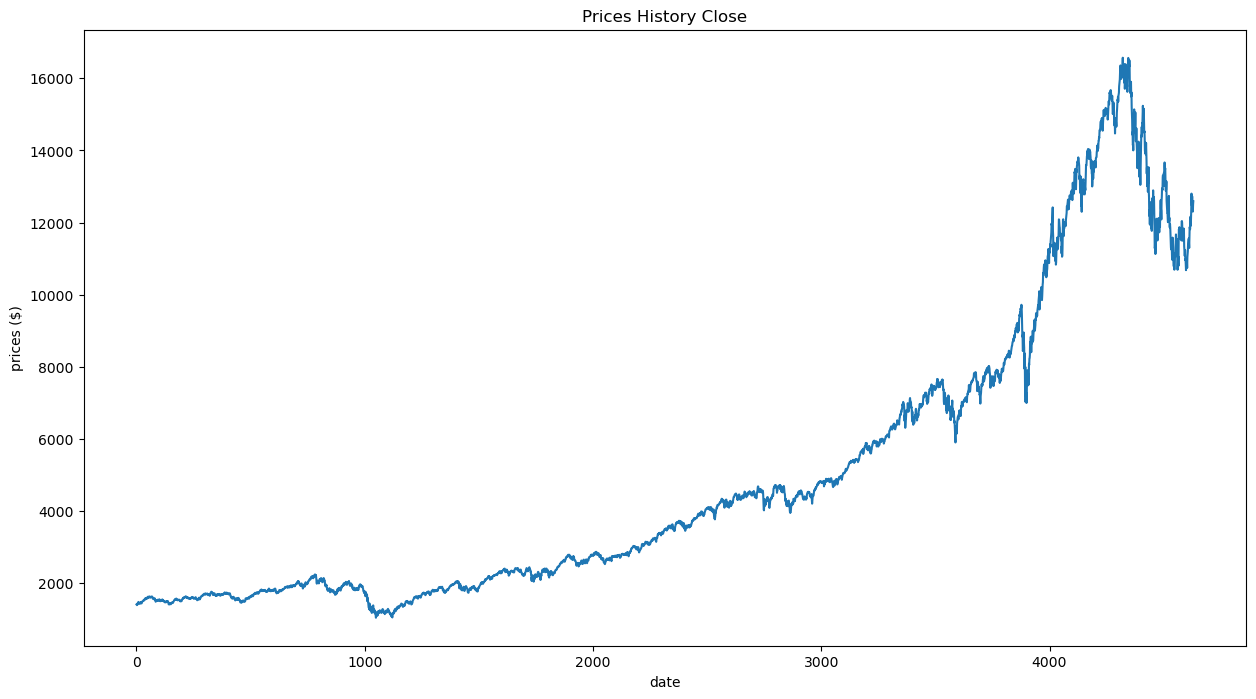

In [7]:
#ราคาปิด
plt.figure(figsize=(15, 8))
plt.title('Prices History Close')
plt.plot(df['close'])
plt.xlabel('date')
plt.ylabel('prices ($)')

In [8]:
print('Samples:', df.shape)
print('Train set:', df[:-252].shape)

Samples: (4631, 7)
Train set: (4379, 7)


In [9]:
#Close
close_prices = df['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* (4279/4531))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(252, len(train_data)):
    x_train.append(train_data[i-252:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
test_data = scaled_data[training_data_len-252: , : ]
x_test = []
#y_test = values[training_data_len:]
y_test = scaled_data[training_data_len:]

for i in range(252, len(test_data)):
    x_test.append(test_data[i-252:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# GRU
model = Sequential()
model.add(layers.LSTM(250,activation='linear', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(layers.LSTM(200,activation='linear', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(layers.LSTM(150, activation='linear' ,return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(layers.LSTM(100, activation='linear' ,return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(layers.LSTM(50, activation='linear',return_sequences=False))
model.add(Dropout(0.2))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [22]:
history = model.fit(x_train, y_train, batch_size= 64, epochs=11,validation_data=(x_test,y_test), verbose=1) #callbacks=callbacks_list)

Epoch 1/11
63/63 [==============================] - 81s 1s/step - loss: 0.0148 - val_loss: 0.0030
Epoch 2/11
63/63 [==============================] - 79s 1s/step - loss: 0.0014 - val_loss: 0.0025
Epoch 3/11
63/63 [==============================] - 79s 1s/step - loss: 0.0012 - val_loss: 0.0058
Epoch 4/11
63/63 [==============================] - 83s 1s/step - loss: 0.0011 - val_loss: 0.0047
Epoch 5/11
63/63 [==============================] - 80s 1s/step - loss: 0.0010 - val_loss: 0.0027
Epoch 6/11
63/63 [==============================] - 79s 1s/step - loss: 0.0012 - val_loss: 0.0021
Epoch 7/11
63/63 [==============================] - 85s 1s/step - loss: 0.0010 - val_loss: 0.0046
Epoch 8/11
63/63 [==============================] - 82s 1s/step - loss: 0.0012 - val_loss: 0.0019
Epoch 9/11
63/63 [==============================] - 81s 1s/step - loss: 0.0010 - val_loss: 0.0048
Epoch 10/11
63/63 [==============================] - 78s 1s/step - loss: 9.5551e-04 - val_loss: 0.0022
Epoch 11/11
63/

In [23]:
train_mse = model.evaluate(x_train, y_train, verbose=0)
test_mse = model.evaluate(x_test, y_test, verbose=0)
print(train_mse, test_mse)

0.00023591720673721284 0.004092320334166288


In [ ]:
data = df.filter(['close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(32,16))
plt.title('Model')
plt.xlabel('date')
plt.ylabel('close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('Time_Series_Crypto.png')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = df.values.reshape(-1, 1)
sc = MinMaxScaler()
data_sc = sc.fit_transform(data)
data_sc[:5]

In [ ]:
def convertToMatrix(data, step=1):
    X, Y = [], []
    for i in range(len(data)-step):
        d = i + step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [ ]:
n_train = 4279

train, test = data_sc[0:n_train], data_sc[n_train:]
train.shape, test.shape

In [ ]:
step = 60 

X_train, y_train = convertToMatrix(train, step)  
X_test, y_test = convertToMatrix(test, step)

print('X Train, Test (after conversion):', X_train.shape, X_test.shape)
print('y Train, Test (after conversion):', y_train.shape, y_test.shape)

In [ ]:
#Model

model = Sequential()

#model.add(LSTM(units=50, return_sequences=True, input_shape=(step, 1), activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=40, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(units=1))  # output

# GRU
model.add(GRU(units=50, return_sequences=True, input_shape=(step, 1), activation='relu'))
model.add(Dropout(0.2))
model.add(GRU(units=40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

In [ ]:
history = model.fit(X_train, y_train,epochs=10, batch_size=16, verbose=1)

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show()

In [ ]:
testPredict = model.predict(X_test) 

testPredict.shape

In [ ]:
y_test.shape

In [ ]:
print(y_train.shape)
sc.inverse_transform(y_train.reshape(-1,1))[:5]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

testPredict_inv = sc.inverse_transform(testPredict)

y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv, testPredict_inv) #

rmse_test = np.sqrt(mean_squared_error(y_test_inv, testPredict_inv))

print('R2 Test: {:.3f}'. format(r2_test))
print('RMSE Test: {:.3f}'. format(rmse_test))

In [ ]:
plt.figure(figsize=(32,16))

plt.plot(y_test_inv, lw=1.3, label='Dataset (Test)')

plt.plot(testPredict_inv, 'r', lw=2.4, label='Prediction')
plt.legend()
plt.show()

In [ ]:
data = df.filter(['close'])
train = data[:-252]
validation = data[-252:]
validation['Predictions'] = testPredict_inv
plt.figure(figsize=(32,16))
plt.title('Model')
plt.xlabel('date')
plt.ylabel('close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['close', 'testPredict_inv']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('Time_Series_Crypto.png')
plt.show()